In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

In [ ]:
# Load the dataset
df = pd.read_excel("/content/SBI RISK.xlsx")


In [ ]:
df.head(20)

,Date,Equity_Value,Debt_Value,Equity_Volatility,Risk_Free_Rate,Time_to_Maturity,Distance_to_Default,Probability_of_Default
0,2020-03-31,3.061810e+12,2.417779e+12,0.174,0.062,5,5.080663,1.880596e-07
1,2020-06-30,3.926071e+12,1.709241e+12,0.249,0.058,1,7.124650,5.217264e-13
2,2020-09-30,3.597991e+12,1.938217e+12,0.157,0.075,3,7.123473,5.262026e-13
3,2020-12-31,3.397988e+12,2.049543e+12,0.332,0.061,1,4.911391,4.521639e-07
4,2021-03-31,2.734028e+12,2.184105e+12,0.202,0.058,5,4.262116,1.012503e-05
5,2021-06-30,2.733992e+12,2.677764e+12,0.283,0.066,5,3.073249,1.058707e-03
6,2021-09-30,2.587125e+12,1.799511e+12,0.212,0.054,3,4.754288,9.957361e-07
7,2021-12-31,3.799264e+12,2.271352e+12,0.254,0.074,1,6.570331,2.510181e-11
8,2022-03-31,3.401673e+12,2.388622e+12,0.259,0.052,5,3.196594,6.953024e-04
9,2022-06-30,3.562109e+12,1.569676e+12,0.187,0.080,3,6.224056,2.422326e-10


In [ ]:
# Apply Merton Model
# Merton requires:
# E = Equity Value, D = Debt Value, sigma_E = Equity Volatility, r = Risk-free rate, T = Maturity

def merton_model(E, D, sigma_E, r, T):
    """
    Returns Distance to Default (DD) and Probability of Default (PD)
    """
    # Asset Value approximation
    V = E + D

    # Asset Volatility (approximation: sigma_V ≈ (E/(E+D)) * sigma_E)
    sigma_V = (E / (E + D)) * sigma_E

    # d1 and d2
    d1 = (np.log(V/D) + (r + 0.5 * sigma_V**2) * T) / (sigma_V * np.sqrt(T))
    d2 = d1 - sigma_V * np.sqrt(T)

    # Distance to Default and Probability of Default
    DD = d2
    PD = norm.cdf(-d2)

    return DD, PD

# Apply model row-wise
df[["Distance_to_Default", "Probability_of_Default"]] = df.apply(
    lambda row: merton_model(
        row["Equity_Value"],
        row["Debt_Value"],
        row["Equity_Volatility"],
        row["Risk_Free_Rate"],
        row["Time_to_Maturity"]
    ), axis=1, result_type="expand"
)

print(df.head())


        Date  Equity_Value    Debt_Value  Equity_Volatility  Risk_Free_Rate  \
0 2020-03-31  3.061810e+12  2.417779e+12              0.174           0.062   
1 2020-06-30  3.926071e+12  1.709241e+12              0.249           0.058   
2 2020-09-30  3.597991e+12  1.938217e+12              0.157           0.075   
3 2020-12-31  3.397988e+12  2.049543e+12              0.332           0.061   
4 2021-03-31  2.734028e+12  2.184105e+12              0.202           0.058   

   Time_to_Maturity  Distance_to_Default  Probability_of_Default  
0                 5             5.080663            1.880596e-07  
1                 1             7.124650            5.217264e-13  
2                 3             7.123473            5.262026e-13  
3                 1             4.911391            4.521639e-07  
4                 5             4.262116            1.012503e-05  


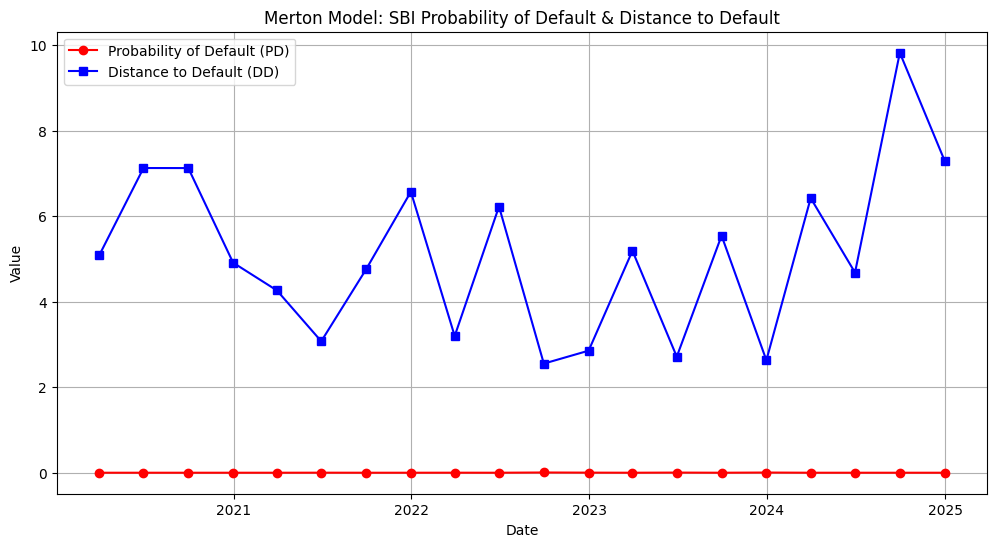

In [ ]:
# ---------- Visualization ----------
plt.figure(figsize=(12,6))

# Plot Probability of Default over time
plt.plot(df["Date"], df["Probability_of_Default"], marker='o', label="Probability of Default (PD)", color="red")

# Plot Distance to Default
plt.plot(df["Date"], df["Distance_to_Default"], marker='s', label="Distance to Default (DD)", color="blue")

plt.title("Merton Model: SBI Probability of Default & Distance to Default")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()

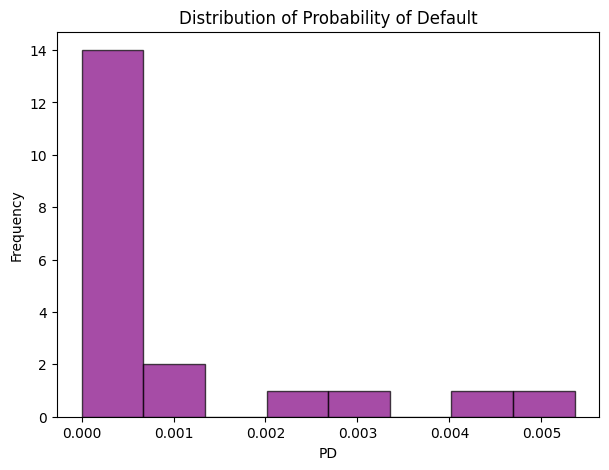

In [ ]:
# Histogram of PD
plt.figure(figsize=(7,5))
plt.hist(df["Probability_of_Default"], bins=8, color="purple", alpha=0.7, edgecolor="black")
plt.title("Distribution of Probability of Default")
plt.xlabel("PD")
plt.ylabel("Frequency")
plt.show()

In [ ]:
# Quick check
print("Columns:", df.columns.tolist())
if "Probability_of_Default" not in df.columns:
    raise ValueError("You must run Merton model first to produce 'Probability_of_Default'.")


Columns: ['Date', 'Equity_Value', 'Debt_Value', 'Equity_Volatility', 'Risk_Free_Rate', 'Time_to_Maturity', 'Distance_to_Default', 'Probability_of_Default']


In [ ]:
# 2) Decide LGD (Loss Given Default)
# Option A: If you have Recovery_Rate column (0-1), LGD = 1 - Recovery_Rate
if "Recovery_Rate" in df.columns:
    df["LGD"] = 1 - df["Recovery_Rate"]
else:
    # Option B: Use a fixed LGD assumption (common choices: 0.4, 0.6 depending on seniority)
    # Set the value here (example 45% LGD)
    fixed_lgd = 0.45
    df["LGD"] = fixed_lgd
    print(f"No 'Recovery_Rate' column found — using fixed LGD = {fixed_lgd:.2f}")

No 'Recovery_Rate' column found — using fixed LGD = 0.45


In [ ]:
# 3) Decide EAD (Exposure at Default)
if "Outstanding_Loan" in df.columns:
    df["EAD"] = df["Outstanding_Loan"]
    print("Using column: Outstanding_Loan as EAD.")
elif "Debt_Value" in df.columns:
    df["EAD"] = df["Debt_Value"]
    print("Using column: Debt_Value as EAD.")
else:
    proxy_fraction = 0.8
    df["EAD"] = df["Debt_Value"] * proxy_fraction
    print("No 'Outstanding_Loan' column — using EAD =", proxy_fraction*100, "% of Debt_Value")

Using column: Debt_Value as EAD.


In [ ]:
# 4) Compute Expected Loss
df["Expected_Loss"] = df["Probability_of_Default"] * df["LGD"] * df["EAD"]
df["EL_as_pct_of_EAD"] = df["Expected_Loss"] / df["EAD"]

In [ ]:
# 5) Display results
display_cols = ["Date", "Probability_of_Default", "LGD", "EAD", "Expected_Loss", "EL_as_pct_of_EAD"]
print(df[display_cols].head(10))

        Date  Probability_of_Default   LGD           EAD  Expected_Loss  \
0 2020-03-31            1.880596e-07  0.45  2.417779e+12   2.046090e+05   
1 2020-06-30            5.217264e-13  0.45  1.709241e+12   4.012902e-01   
2 2020-09-30            5.262026e-13  0.45  1.938217e+12   4.589527e-01   
3 2020-12-31            4.521639e-07  0.45  2.049543e+12   4.170282e+05   
4 2021-03-31            1.012503e-05  0.45  2.184105e+12   9.951362e+06   
5 2021-06-30            1.058707e-03  0.45  2.677764e+12   1.275735e+09   
6 2021-09-30            9.957361e-07  0.45  1.799511e+12   8.063270e+05   
7 2021-12-31            2.510181e-11  0.45  2.271352e+12   2.565677e+01   
8 2022-03-31            6.953024e-04  0.45  2.388622e+12   7.473665e+08   
9 2022-06-30            2.422326e-10  0.45  1.569676e+12   1.711020e+02   

   EL_as_pct_of_EAD  
0      8.462683e-08  
1      2.347769e-13  
2      2.367912e-13  
3      2.034738e-07  
4      4.556265e-06  
5      4.764182e-04  
6      4.480813e-07 

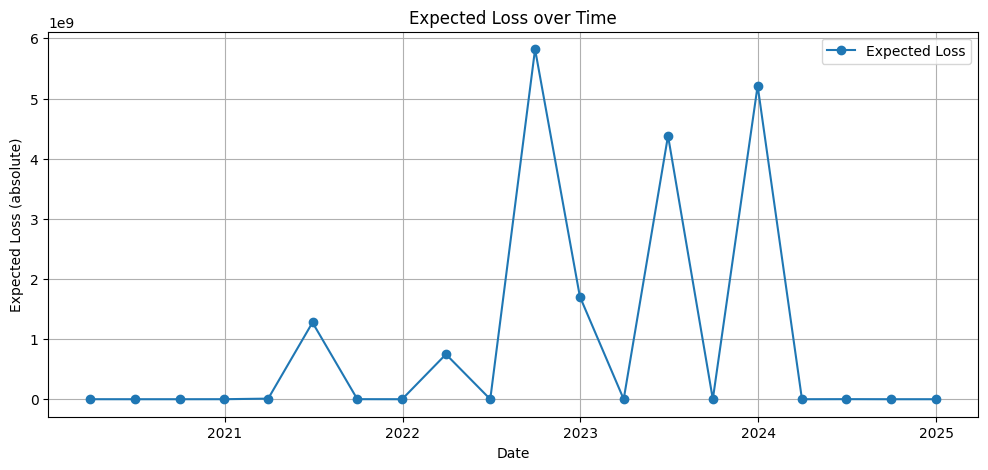

In [ ]:
# 6) Visualizations
plt.figure(figsize=(12,5))
plt.plot(df["Date"], df["Expected_Loss"], marker="o", label="Expected Loss")
plt.title("Expected Loss over Time")
plt.xlabel("Date")
plt.ylabel("Expected Loss (absolute)")
plt.grid(True)
plt.legend()
plt.show()

/tmp/ipython-input-2911108736.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(df["Date"].dt.strftime("%Y-%m-%d"), rotation=45)


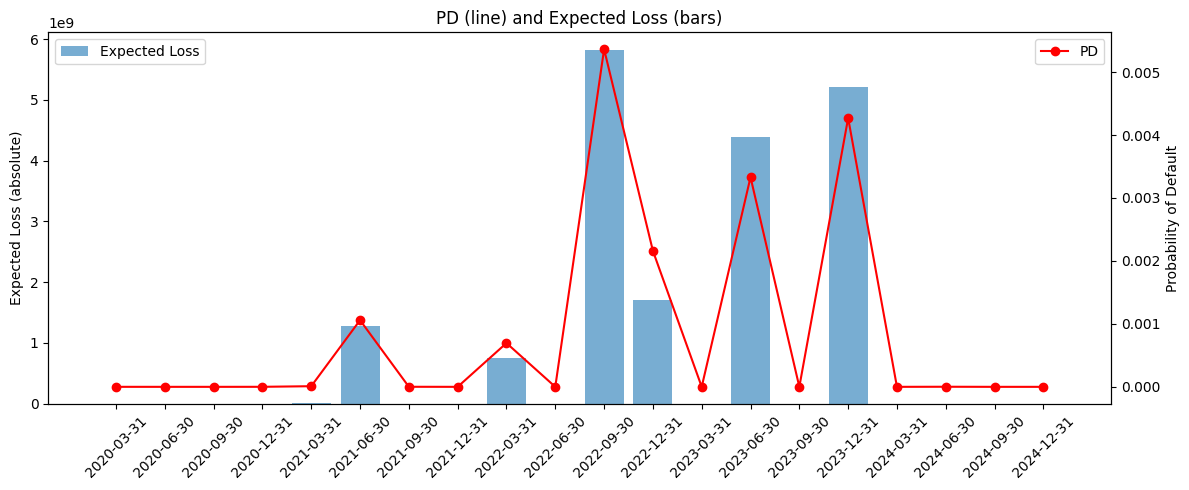

In [ ]:
fig, ax1 = plt.subplots(figsize=(12,5))
ax2 = ax1.twinx()
ax1.bar(df["Date"].astype(str), df["Expected_Loss"], alpha=0.6, label="Expected Loss")
ax2.plot(df["Date"].astype(str), df["Probability_of_Default"], color="red", marker="o", label="PD")
ax1.set_xticklabels(df["Date"].dt.strftime("%Y-%m-%d"), rotation=45)
ax1.set_ylabel("Expected Loss (absolute)")
ax2.set_ylabel("Probability of Default")
ax1.set_title("PD (line) and Expected Loss (bars)")
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")
plt.tight_layout()
plt.show()

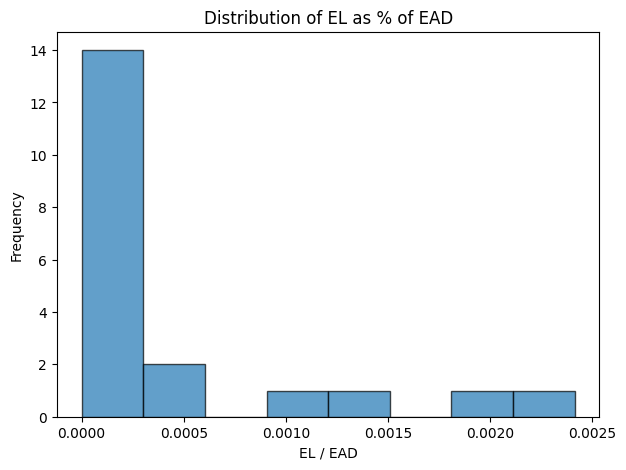

In [ ]:
plt.figure(figsize=(7,5))
plt.hist(df["EL_as_pct_of_EAD"].dropna(), bins=8, edgecolor="k", alpha=0.7)
plt.title("Distribution of EL as % of EAD")
plt.xlabel("EL / EAD")
plt.ylabel("Frequency")
plt.show()

In [ ]:
# 7) Save output
df.to_excel("SBI_Merton_EL_output.xlsx", index=False)
print("Saved results to SBI_Merton_EL_output.xlsx")

Saved results to SBI_Merton_EL_output.xlsx
